# Homework 6: Hypothesis testing and confidence intervals (50 points)

**Reading**: Textbook chapter [11](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses) Testing Hypotheses and [13](https://www.inferentialthinking.com/chapters/13/Estimation) Estimation.

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 6 is due on Tuesday, March 1, at 9:00am. Late work will not be accepted without prior arrangements.

In [1]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Landing a Spacecraft

(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations (meters away from the center of the landing pad).

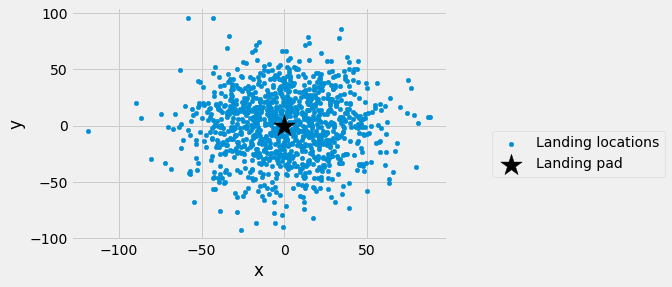

In [2]:
ordinary_landing_spots = pd.read_csv("ordinary_landing_spots.csv")
ordinary_landing_spots.plot.scatter("x", "y",label="Landing locations")
plt.scatter(0, 0, c="black", s=500, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

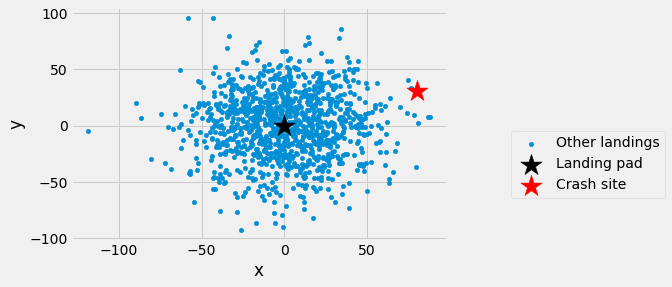

In [3]:
landing_spot = np.array([80.59, 30.91])
ordinary_landing_spots.plot.scatter("x", "y",label="Other landings")
plt.scatter(0, 0, c="black", s=500, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=500, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

#### Question 1

Suppose we would like to use hypothesis testing to shed light on this question.  We have written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was normal, its location was another point in the distribution of the normal landing pad location.

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.


#### Question 2
What's a good test statistic?

A good test statistic would be the positions, or the coordinates, of each of the landings added together. 

#### Question 3
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [ ]:


def landing_test_statistic(x_coordinate, y_coordinate):
    

#### Question 4
The cell below computes a P-value using your test statistic.  Does the calculation makes sense for your test statistic? Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated? If not, why not?

In [ ]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = np.array([])
for i in np.arange(len(ordinary_landing_spots)):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.x[i],
        ordinary_landing_spots.y[i])
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

*Write your answer here, replacing this text.*

#### Question 5

Do the data suggest that this landing was special? Give a short justification of your answer.

*Write your answer here, replacing this text.*

## 2. Proportions known by sampling ##

In May 2015, there were a lot of Republican candidates for the party's presidential election ticket.

 http://www.http://www.npr.org/sections/itsallpolitics/2015/05/29/410524780/the-gop-has-an-overcrowded-debate-problem
 
 A Quinippiac University poll reported fractions of a sample of 679 likely Republican primary voters, 
 rounded to the nearest percentage.  The candidates with the top fourteen polling percentages got 
 about 470 votes are reported here:


|Candidate  | Proportion|
|:------------:|:------------:|
|Bush  | 0.10 |
|Carson| 0.10 |
|Huckabee | 0.10 |
|Rubio  | 0.10 |
|Paul   | 0.07 |
|Cruz   | 0.06 |
|Trump   | 0.05 |
|Christie   | 0.04 | 
|Fiorina  | 0.02 |
|Kasich   | 0.02 |
|Graham  | 0.01 |
|Jundal  | 0.01 |
|Perry  | 0.01 |


From this sample, we are asked by our sponsor to generate confidence intervals for the proportion of voters voting for candidate Paul (at 7%).   


In [4]:
# The table `votes` contains the results of the survey. 
votes = pd.DataFrame({'vote': np.array(['Bush']*68 + ['Carson']*68 + ['Huckabee']*68 + ['Rubio']*68 + ['Paul']*47+
                                      ["Cruz"]*40 + ["Trump"] * 34 + ["Christie"] * 27 + ["Fiorina"] * 14 + ["Kasich"] * 14 +
                                      ["Graham"]* 7 + ["Jindal"]  * 7 + ["Perry"] * 7)
                     })
num_votes = len(votes)
print(num_votes)
votes.sample(5,replace=True)

469


,vote
439,Kasich
261,Rubio
248,Rubio
20,Bush
34,Bush


Below, we have give you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate B**.

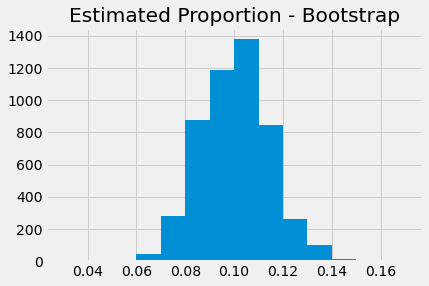

In [5]:
def proportions_in_resamples(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        sample_statistic = np.count_nonzero(bootstrap.vote == 'Paul')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples(5000)

plt.hist(sampled_proportions,bins=np.arange(0.03,.17,0.01))
plt.title("Estimated Proportion - Bootstrap")
plt.show()

**Question 6.** Using the array `sampled_proportions`, compute an 95% confidence interval for the true proportions of voters planning on voting for candidate Paul.  
(Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.) This is a **percentile bootstrap confidence interval** 

In [6]:
con_interval = 0.95
p = ((1-con_interval)/2)*100
p_2 = (con_interval+((1-con_interval)/2))*100
b_lower_bound = np.percentile(sampled_proportions, p)
b_upper_bound = np.percentile(sampled_proportions, p_2)
print("Bootstrapped 95% confidence interval for the proportion of voters in the population for Paul: [{:f}, {:f}]"\
      .format(b_lower_bound, b_upper_bound))


Bootstrapped 95% confidence interval for the proportion of voters in the population for Paul: [0.074627, 0.127932]


There are four candidates with 10% of the votes in the sample.  Symmetry tells us no one of them can have more than 25% chance of winning (based only on what we know from the sample)

**Question 7.** Use the bootstrap samples to estimate the probability Bush (or the others polling with 10% of the sample) will win.  Use the bootstrap samples to estimate the probablity Paul will win (that is, what fraction of the boostrap samples have Paul getting the most number of votes or tying for 1st place?) 

In [ ]:
# Answer Question 2 here



**Question 8.** Use math to find the condifence interval.  
Assume the fraction of voters for Paul can be expressed as a beta distribution with alpha = 68 and beta = 611, find 95% lower and upper bounds for the proportion of voters for Paul.  **Hint:  Use the .ppf() method for the inverse cumulative beta distribution.** 


## 3. Draw toy confidence intervals 


A computational experiment is described on this page
https://www.graphpad.com/support/faq/the-distinction-between-confidence-intervals-prediction-intervals-and-tolerance-intervals/
and the results of this computational experiment (an example of a forward problem, where the relevant parameters are assumed from the start) are presented in two plots, one of which I present here:

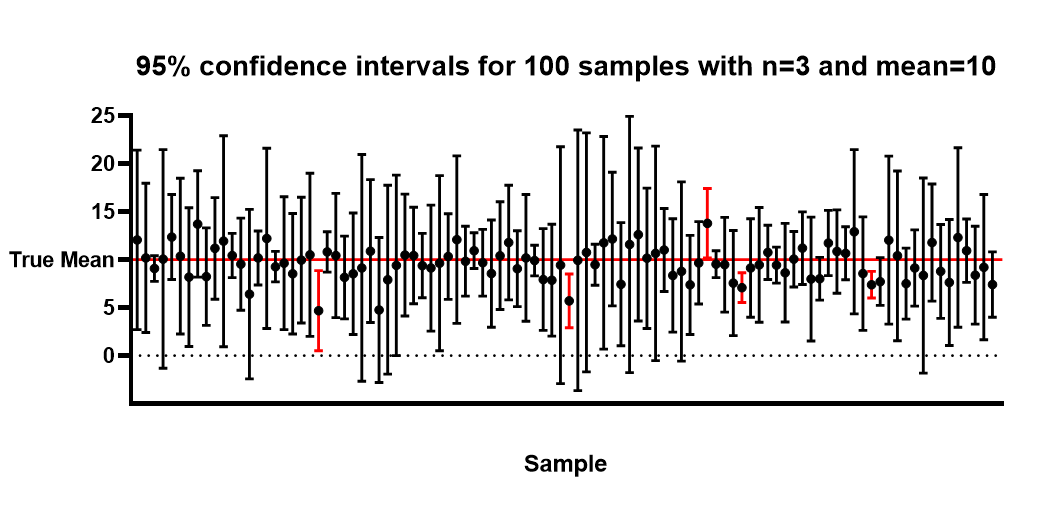


"The diagram below shows 95% confidence intervals for 100 samples of size 3 from a Gaussian distribution with true mean of 10."  **Note: this description does not give the variance**

This assignment asks you to perform this simulation and redraw this graph.  We will need to find the parameters for the distriubtions of the random variables, perform the simluation, and put the results in a dot plot. 

We are going to initially assume a normally distributed random variable with mean 10 and standard deviation 3 as our "population".

Let us take 100 samples of size 3.



**Question 10**  
Generate 100 samples from this distribution.  Plot the sample mean and sample standard deviations of all 100 samples.  (Either dot plots or histograms are fine; this is a visualization to help us understand.)  

**Hint:  Whenever you use error bars, the caption or the axis labels must indicate whether they are 1-standard-deviation bars or something else.**

**Question 11**
Using Student's t-distribution with 2 degrees of freedom, calculate the widths of error bars about all 100 sample means that will ensure that 95% of the intervals will include the true mean.   In other words, calculate 95% confidence bands about the sample means.

**Question 12**
Find the value of the standard deviation for the population used in the initial demo.  The underlying Gaussian variates had a value of s that made the confidence intervals include zero 12 times in 100 samples.  (math or computation, just get the answer within 10%)

**Question 13**
Write code to draw the plot as above, showing 95% confidence intervals about sample means for samples of size 3 from a normal population.  (You can get full credit for question 13 even if you didn't find the value for s in Q12.)

In [ ]:
# Here is some code that makes a dot-plot with error bars.

# You will need to replace the values and add labels.

In [71]:
means = np.random.random(100) * 30 +15
bars = np.ones(shape=100)*10

<ErrorbarContainer object of 3 artists>

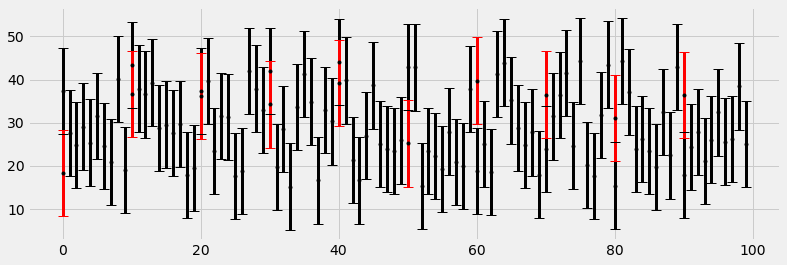

In [77]:

# plot all the dots black
plt.figure(figsize=(12,4))
plt.errorbar(range(len(means)), means, bars, fmt=".k", capsize=5, ecolor="black", linewidth=3)
# select some points that will be plotted in a different color.. this selects every tenth dot.
outsideindexes = np.where( (np.arange(len(means)) % 10 ==0)  )[0]  
outsidemeans = a[outsideindexes]
outsidebars = b[outsideindexes]
# plot some of the dots red:
plt.errorbar(outsideindexes, outsidemeans, outsidebars, fmt=".k", capsize=5, ecolor="red", linewidth=3)
